In [62]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [63]:
data = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [64]:
data.shape

(11251, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
data.drop(['Status','unnamed1'],axis=1,inplace=True)

In [12]:
pd.isnull(data).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [13]:
data.dropna(inplace=True)

In [14]:
data['Amount']=data['Amount'].astype('int')

In [16]:
data.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

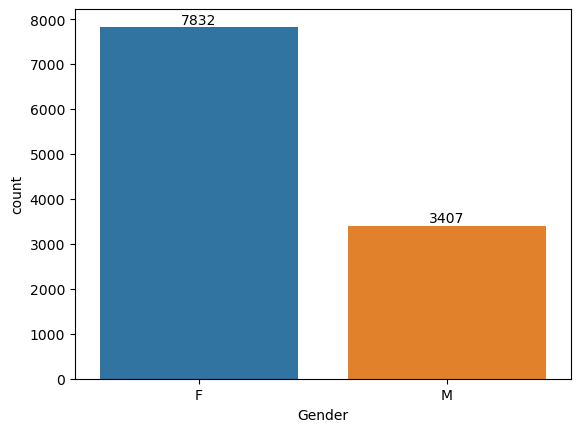

In [20]:
# Plotting Bar chart for Gender and its count
gen_count=sns.countplot(x='Gender',data=data)
for i in gen_count.containers:
    gen_count.bar_label(i)

In [ ]:
No. of Buyers on the Basis of Gender

Gender

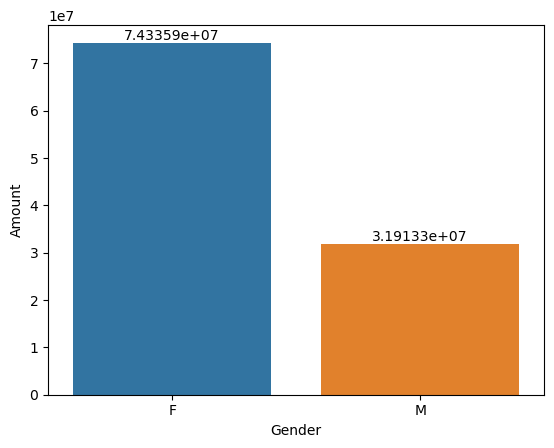

In [26]:
# plotting a bar chart for gender vs total amount of sales
gen_sales=data.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
gs=sns.barplot(x='Gender',y='Amount',data=gen_sales)
for i in gs.containers:
    gs.bar_label(i)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

In [ ]:
# Age

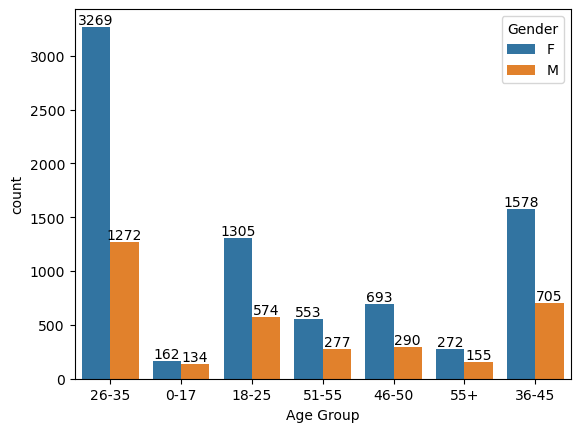

In [28]:
# No. of buyers age wise
age_count=sns.countplot(data = data, x = 'Age Group', hue = 'Gender')
for bars in age_count.containers:
    age_count.bar_label(bars)

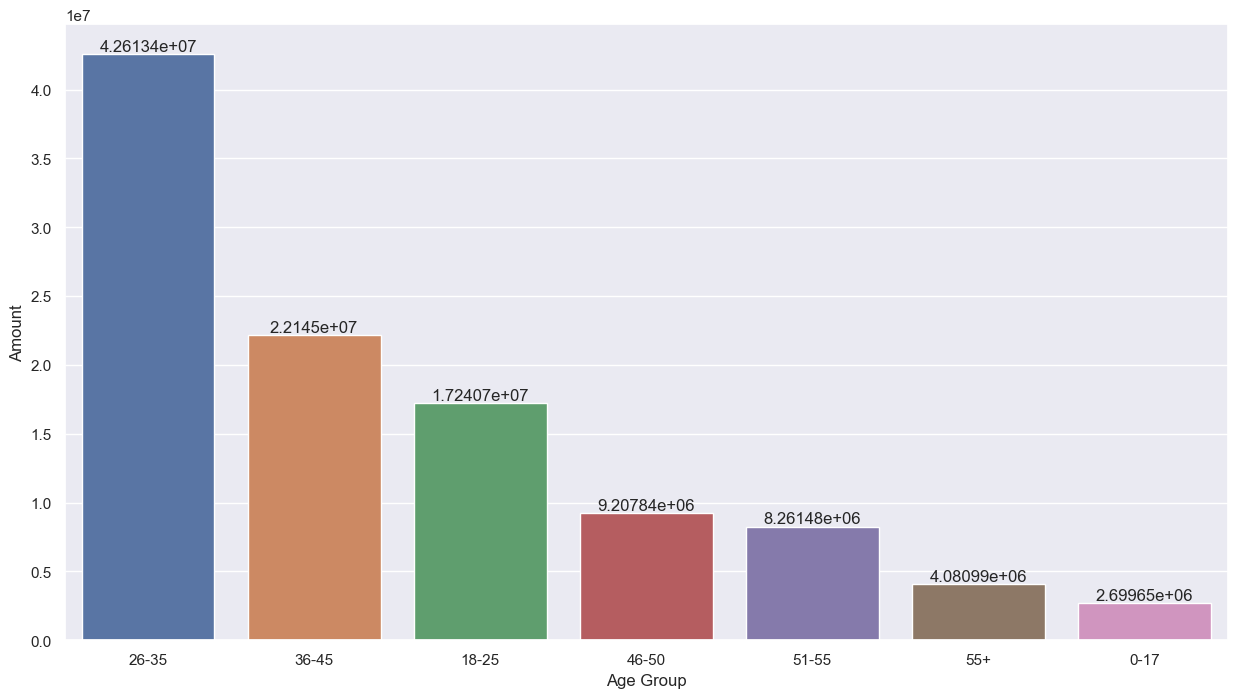

In [33]:
# Total Amount vs Age Group
sales_age = data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(15,8)})
sa=sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age)
for bars in sa.containers:
    sa.bar_label(bars)

Most of the buyers are of age group between 26-35 yrs female

In [34]:
# STATE

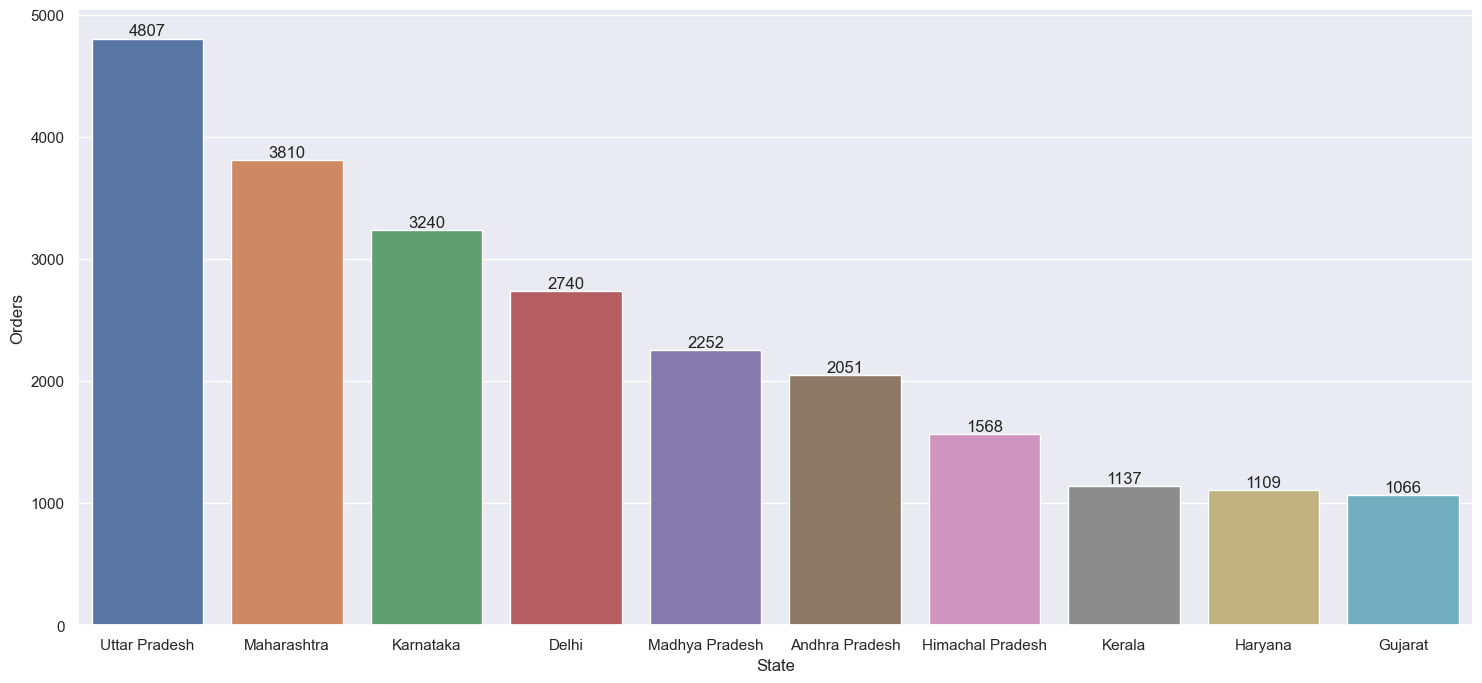

In [41]:
# total number of orders from top 10 states

state_sales = data.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,8)})
ss=sns.barplot(data = state_sales, x = 'State',y= 'Orders')
for i in ss.containers:
    ss.bar_label(i)

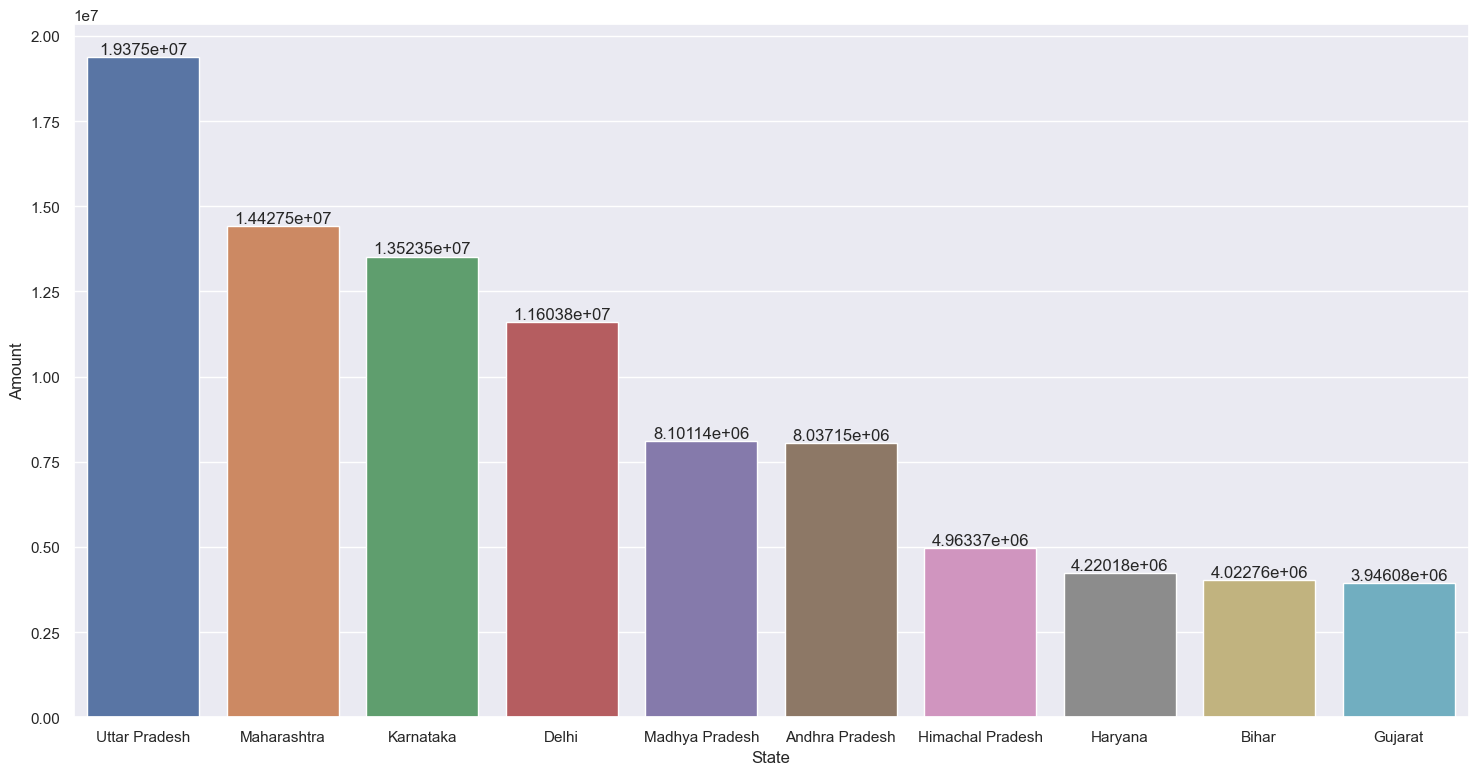

In [42]:
# total amount/sales from top 10 states

state_sales = data.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(18,9)})
ssa=sns.barplot(data = state_sales, x = 'State',y= 'Amount')
for i in ssa.containers:
    ssa.bar_label(i)

most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

In [43]:
#MARITAL STATE

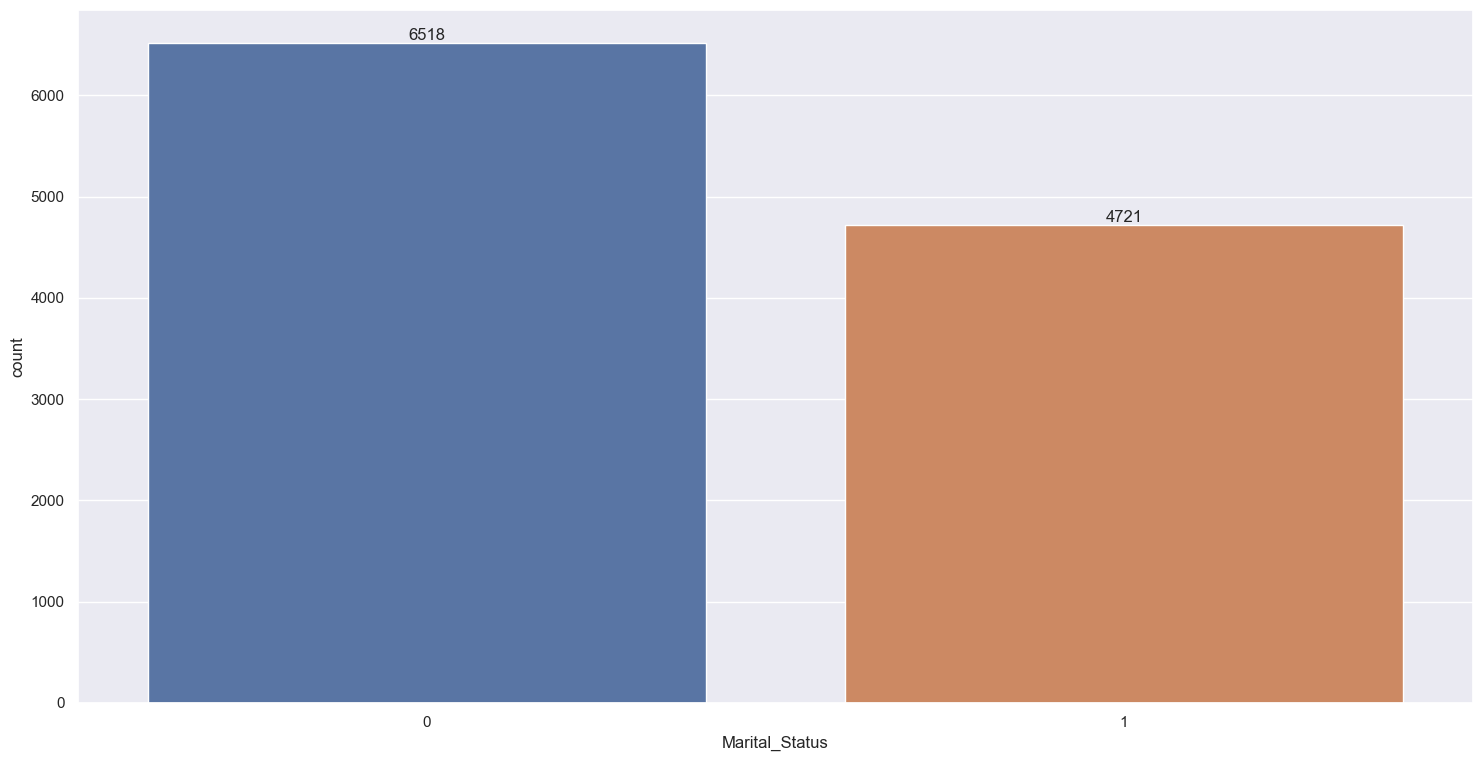

In [45]:
marital = sns.countplot(data = data, x = 'Marital_Status')

sns.set(rc={'figure.figsize':(7,5)})
for i in marital.containers:
    marital.bar_label(i)

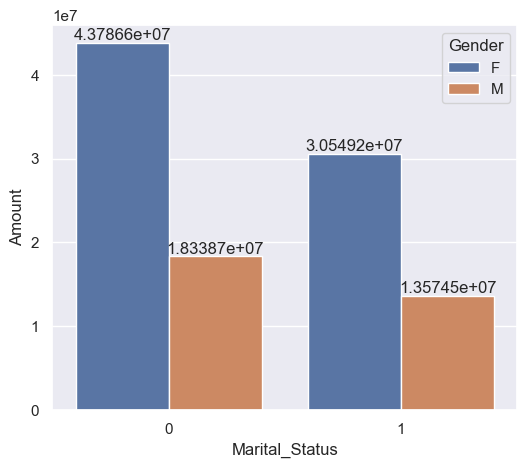

In [46]:
sales_state = data.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
ss=sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')
for i in ss.containers:
    ss.bar_label(i)

Most of the buyers are married (women) and they have high purchasing power

In [47]:
# OCCUPATION

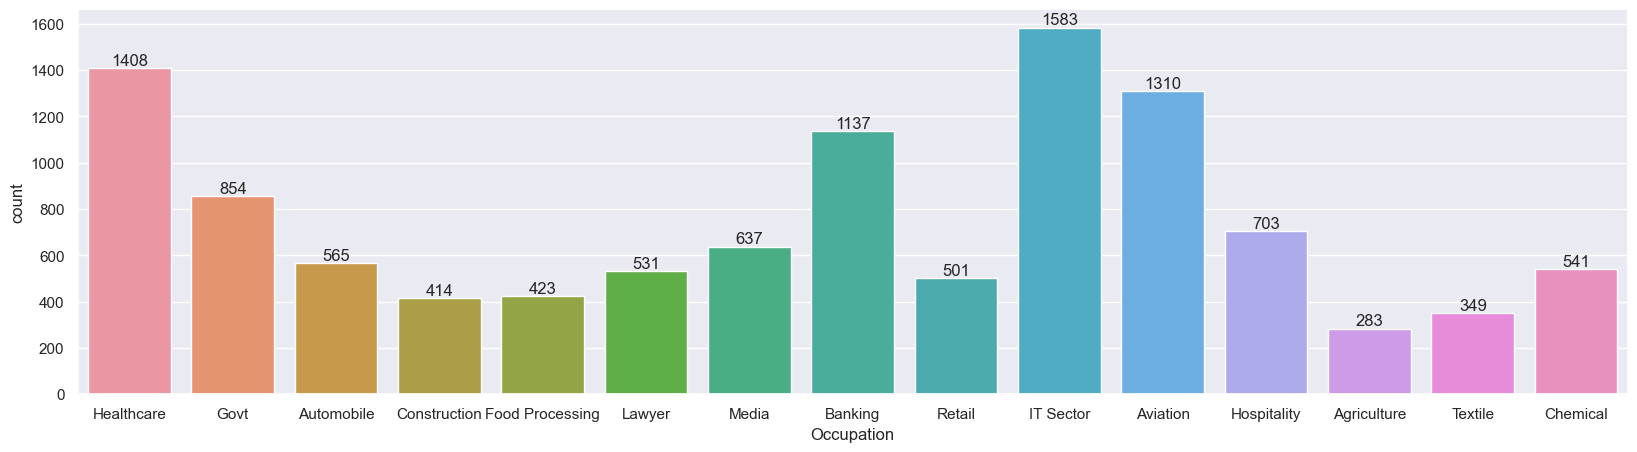

In [49]:
sns.set(rc={'figure.figsize':(20,5)})
occ = sns.countplot(data = data, x = 'Occupation')

for bars in occ.containers:
    occ.bar_label(bars)

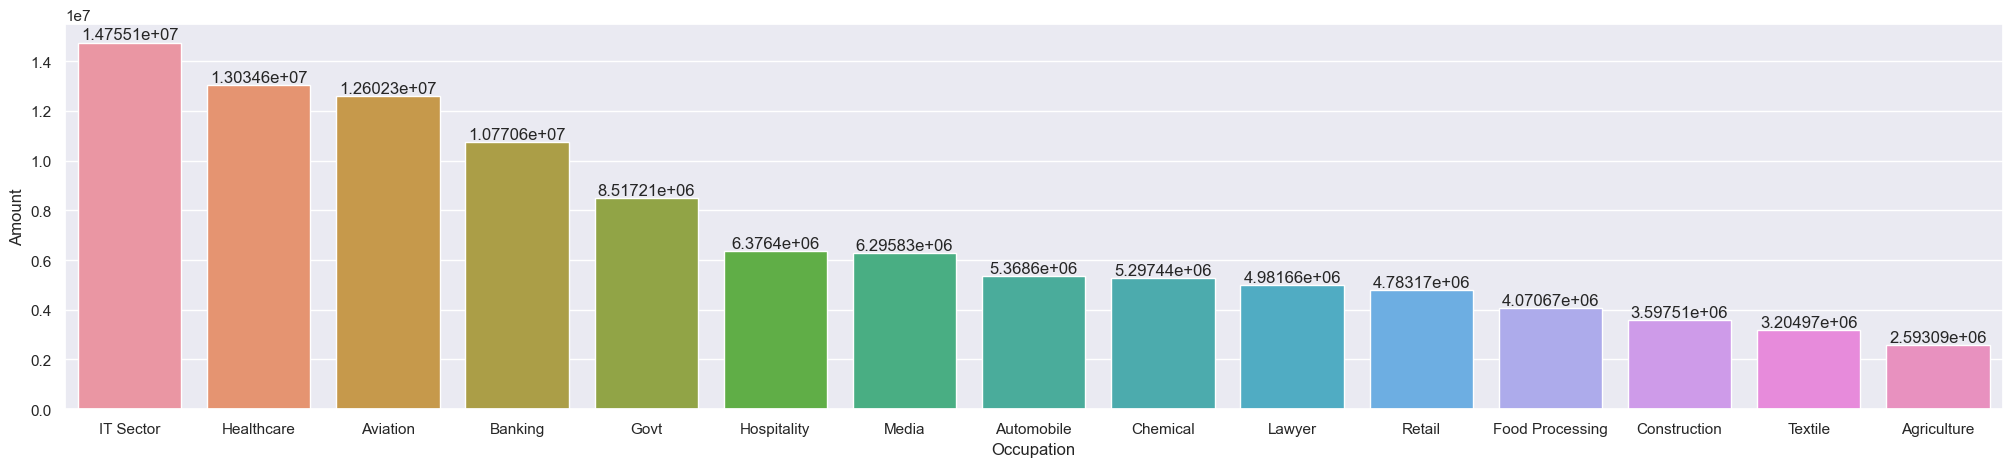

In [51]:
sales_state = data.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(25,5)})
ss=sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
for i in ss.containers:
    ss.bar_label(i)

 Most of the buyers are working in IT, Healthcare and Aviation sector

In [52]:
# PRODUCT CATEGORY:

<Axes: xlabel='Product_ID'>

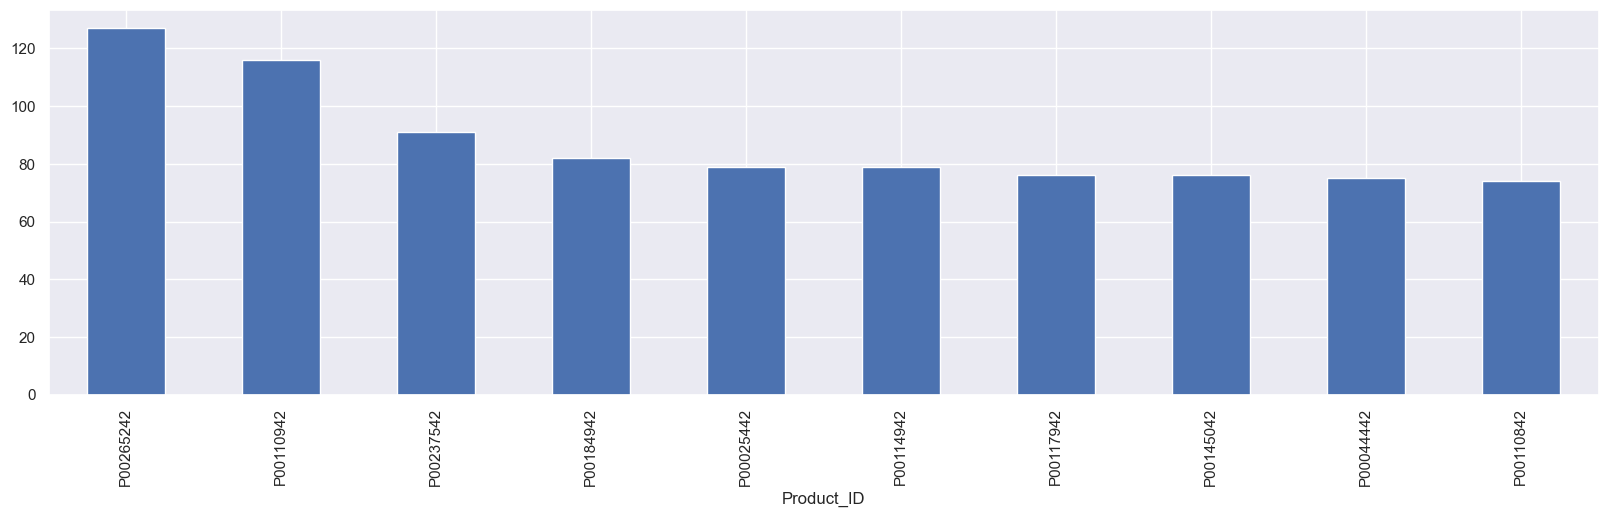

In [61]:
# top 10 most sold products
fig1, ax1 = plt.subplots(figsize=(12,7))
data.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

CONCLUSION:

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category